# Dataset Description

This dataset contains all the laws and regulations for possessing Guns and fire arms applied in all 50 U.S states throughout the period starting from 1991 until 2020.  

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import json
import seaborn as sns
from google.colab import files
import scipy 
import statistics
from scipy.stats import norm


# Reading the data


In [ ]:
#reading the firearm data set
data = pd.read_excel('firearm.xlsx')
data.head()

,state,year,felony,invcommitment,invoutpatient,danger,drugmisdemeanor,alctreatment,alcoholism,relinquishment,...,expartedating,dvrosurrender,dvrosurrendernoconditions,dvrosurrenderdating,expartesurrender,expartesurrendernoconditions,expartesurrenderdating,dvroremoval,stalking,lawtotal
0,Alabama,1991,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,15
1,Alabama,1992,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
2,Alabama,1993,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
3,Alabama,1994,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16
4,Alabama,1995,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,16


In [ ]:
#reading the Nibris data set
df = pd.read_csv('nibrs.csv',index_col=0)



# Violent Crimes analysis

In [ ]:
violent_crimes = ['assault-offenses','homicide-offenses','robbery','kidnapping-abduction','sex-offenses']
violent_df = df[df['Offense'].isin(violent_crimes)]
violent_df.head()

,Offense,State,Year,Count
1095,assault-offenses,Hawaii,2018,1364
1096,assault-offenses,Hawaii,2019,1413
1097,assault-offenses,Hawaii,2020,1364
1098,assault-offenses,Hawaii,2021,1505
1099,assault-offenses,Hawaii,2018,1384


In [ ]:
grouped_violent_df = violent_df.groupby(['Year','State'],group_keys=True,dropna=False).sum().reset_index()
grouped_violent_df

,Year,State,Count
0,1991,Alabama,71121
1,1991,Illinois,13
2,1991,North Dakota,2332
3,1991,South Carolina,77873
4,1992,Alabama,60778
...,...,...,...
900,2021,Virginia,95051
901,2021,Washington,74323
902,2021,West Virginia,12556
903,2021,Wisconsin,42977


In [ ]:
grouped_df = df.groupby(['Year','State'],group_keys=True,dropna=False).sum().reset_index()
grouped_df

,Year,State,Count
0,1991,Alabama,334032
1,1991,Illinois,38
2,1991,Iowa,3
3,1991,North Dakota,21928
4,1991,South Carolina,218370
...,...,...,...
907,2021,Virginia,361847
908,2021,Washington,244529
909,2021,West Virginia,39832
910,2021,Wisconsin,161030


As seen, there are some states that do not have violent crimes. Hence, we need to consider them in our calculations

In [ ]:
for i in range(len(grouped_df)):
  if (grouped_violent_df.iloc[i]['State'] != grouped_df.iloc[i]['State']):
    line = grouped_df[i:i+1]
    line['Count'] = 0
    grouped_violent_df = pd.concat([grouped_violent_df[:i], line, grouped_violent_df[i:]]).reset_index(drop=True)
grouped_violent_df

<ipython-input-10-04460ce1ca32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  line['Count'] = 0


,Year,State,Count
0,1991,Alabama,71121
1,1991,Illinois,13
2,1991,Iowa,0
3,1991,North Dakota,2332
4,1991,South Carolina,77873
...,...,...,...
907,2021,Virginia,95051
908,2021,Washington,74323
909,2021,West Virginia,12556
910,2021,Wisconsin,42977


In [ ]:
percentage = grouped_violent_df['Count']/grouped_df['Count']
percentage

0      0.212917
1      0.342105
2           NaN
3      0.106348
4      0.356610
         ...   
907    0.262683
908    0.303943
909    0.315224
910    0.266888
911    0.338678
Name: Count, Length: 912, dtype: float64

In [ ]:
per_df = grouped_violent_df.copy()
per_df.rename(columns = {'Count':'Total Violent Crimes'}, inplace = True)
per_df['Total Crimes'] = grouped_df['Count']
per_df['Percentage'] = percentage
per_df

,Year,State,Total Violent Crimes,Total Crimes,Percentage
0,1991,Alabama,71121,334032,0.212917
1,1991,Illinois,13,38,0.342105
2,1991,Iowa,0,0,NaN
3,1991,North Dakota,2332,21928,0.106348
4,1991,South Carolina,77873,218370,0.356610
...,...,...,...,...,...
907,2021,Virginia,95051,361847,0.262683
908,2021,Washington,74323,244529,0.303943
909,2021,West Virginia,12556,39832,0.315224
910,2021,Wisconsin,42977,161030,0.266888


In [ ]:
per_df[per_df['State'] == 'Alabama'] 

,Year,State,Total Violent Crimes,Total Crimes,Percentage
0,1991,Alabama,71121,334032,0.212917
5,1992,Alabama,60778,291708,0.208352
269,2006,Alabama,914,5753,0.158874
305,2007,Alabama,936,5510,0.169873
341,2008,Alabama,937,5166,0.181378
378,2009,Alabama,902,4966,0.181635
415,2010,Alabama,931,4641,0.200603
452,2011,Alabama,808,4611,0.175233
489,2012,Alabama,901,4584,0.196553
527,2013,Alabama,769,4838,0.158950


In [ ]:
per_final_df = per_df.groupby('State',group_keys=True,dropna=False).mean().reset_index()
per_final_df

,State,Year,Total Violent Crimes,Total Crimes,Percentage
0,Alabama,2011.055556,12120.666667,51496.944444,0.200422
1,Alaska,2021.000000,5447.000000,14163.000000,0.384594
2,Arizona,2012.500000,5391.722222,30676.000000,0.153570
3,Arkansas,2010.000000,42505.521739,179456.695652,0.228728
4,California,2021.000000,30789.000000,91936.000000,0.334896
5,Colorado,2007.285714,33655.642857,145739.071429,0.236660
6,Connecticut,2009.500000,21042.000000,63547.000000,0.328895
7,Delaware,2011.000000,20992.380952,92872.333333,0.225638
8,District of Columbia,2010.500000,1508.318182,3238.409091,0.473333
9,Florida,2021.000000,421.000000,820.000000,0.513415


# Recidivism data for the state of Georgia [2013-2015] 

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id 1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
df3 = pd.read_csv("/content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1QbFY6CrXnMW561p3lZ8gyra9Jfn4AJBK
To: /content/NIJ_s_Recidivism_Challenge_Full_Dataset.csv
100% 7.42M/7.42M [00:00<00:00, 192MB/s]


In [ ]:
# pull data from drive
#df = pd.read_csv("/content/drive/MyDrive/Statistics Project/Datasets/Recidivism/NIJ_s_Recidivism_Challenge_Full_Dataset.csv")

In [ ]:
df3.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [ ]:
df3.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [ ]:
df3.shape

(25835, 54)

In [ ]:
# find the null values
df3.isnull().sum()

ID                                                      0
Gender                                                  0
Race                                                    0
Age_at_Release                                          0
Residence_PUMA                                          0
Gang_Affiliated                                      3167
Supervision_Risk_Score_First                          475
Supervision_Level_First                              1720
Education_Level                                         0
Dependents                                              0
Prison_Offense                                       3277
Prison_Years                                            0
Prior_Arrest_Episodes_Felony                            0
Prior_Arrest_Episodes_Misd                              0
Prior_Arrest_Episodes_Violent                           0
Prior_Arrest_Episodes_Property                          0
Prior_Arrest_Episodes_Drug                              0
Prior_Arrest_E

## Data Preprocessing

In [ ]:
columns_of_interest = ['Race', 'Supervision_Risk_Score_First']

In [ ]:
df3.shape

(25835, 54)

In [ ]:
df_reg = df3[columns_of_interest]
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Race                          25835 non-null  object 
 1   Supervision_Risk_Score_First  25360 non-null  float64
dtypes: float64(1), object(1)
memory usage: 403.8+ KB


In [ ]:
df_reg.head(10)

,Race,Supervision_Risk_Score_First
0,BLACK,3.0
1,BLACK,6.0
2,BLACK,7.0
3,WHITE,7.0
4,WHITE,4.0
5,WHITE,5.0
6,BLACK,2.0
7,BLACK,5.0
8,BLACK,7.0
9,BLACK,5.0


In [65]:
# Separating the white and black races into different dataframes
df_black = df_reg[df_reg['Race'] == 'BLACK']
df_white = df_reg[df_reg['Race'] == 'WHITE']


# Fire-arm Laws Dataset

**Putting the laws into categories**

In [ ]:
#making a copy of the original data 
df1 = data.copy()


In [ ]:
#Grouping the laws that belong to the Dealer Regualtions category
df1['Dealer_Regulations'] = df1.apply(lambda x: x['dealer'] + x['dealerh'] + x['recordsdealer'] + x['recordsdealerh'] + x['recordsall'] + x['recordsallh'] + x['reportdealer'] 
                                    + x['reportdealerh'] + x['reportall'] + x['reportallh'] + x['purge'] + x['residential'] + x['theft'] + x['security'] + x['inspection']
                                    + x['liability'] + x['junkgun'], axis=1)

In [ ]:
#Grouping the laws that belong to the Buyer regulations category
df1['Buyer_Regulations'] = df1.apply(lambda x: x['waiting'] + x['waitingh'] + x['permit'] + x['permith'] + x['permitlaw'] + x['fingerprint'] + x['training'] 
                                    + x['registration'] + x['registrationh'] + x['defactoreg'] + x['defactoregh'] + x['age21handgunsale'] + x['age18longgunsale'] 
                                    + x['age21longgunsaled'] + x['age21longgunsale'] + x['loststolen'] + x['onepermonth'], axis=1)

In [ ]:
#Grouping the laws that belong to the High-risk guns prohibtion category
df1['High-risk_guns_prohibtion'] = df1.apply(lambda x: x['felony'] + x['violent'] + x['violenth'] + x['violentpartial'] + x['invcommitment'] + x['invoutpatient'] + x['danger'] 
                                    + x['drugmisdemeanor'] + x['alctreatment'] + x['alcoholism'] + x['relinquishment'] , axis=1)

In [ ]:
#Grouping the laws that belong to the Background checks category
df1['Background_checks'] = df1.apply(lambda x: x['universal'] + x['universalh'] + x['gunshow'] + x['gunshowh'] + x['universalpermith'] + x['backgroundpurge'] + x['threedaylimit'] 
                                    + x['mentalhealth'] + x['statechecks'] + x['statechecksh'], axis=1)

In [ ]:
#Grouping the laws that belong to the Ammunition regulations category
df1['Ammunition_regulations'] = df1.apply(lambda x: x['ammlicense'] + x['ammrecords'] + x['ammpermit'] + x['ammrestrict'] + x['amm18'] + x['amm21h'] + x['ammbackground'], axis=1)

In [ ]:
#Grouping the laws that belong to the Possession regulations category
df1['Possession_regulations'] = df1.apply(lambda x: x['age21handgunpossess'] + x['age18longgunpossess'] + x['age21longgunpossess'] + x['gvro'] + x['gvrolawenforcement'] + x['college']
                                        + x['collegeconcealed'] + x['elementary'] + x['opencarryh'] + x['opencarryl'] + x['opencarrypermith'] + x['opencarrypermitl'], axis=1)

In [ ]:
#Grouping the laws that belong to the Concealed carry permitting category
df1['Concealed-carry_permitting'] = df1.apply(lambda x: x['permitconcealed'] + x['mayissue'] + x['showing'] + x['ccrevoke']
                                            + x['ccbackground'] + x['ccbackgroundnics'] + x['ccrenewbackground'], axis=1)

In [ ]:
#Grouping the laws that belong to the Assault weapons and large-capacity magazines category
df1['Assault_weapons&large-capacity_magazines'] = df1.apply(lambda x: x['assault'] + x['onefeature'] + x['assaultlist'] + x['assaultregister'] + x['assaulttransfer'] + x['magazine'] 
                                                          + x['tenroundlimit'] + x['magazinepreowned'], axis=1)

In [ ]:
#Grouping the laws that belong to the Child access prevention category
df1['Child-access_prevention'] = df1.apply(lambda x: x['lockd'] + x['lockp'] + x['lockstandards'] + x['locked'] + x['capliability'] + x['capaccess'] + x['capuses'] 
                                    + x['capunloaded'] + x['cap18'] + x['cap16'] + x['cap14'], axis=1)

In [ ]:
#Grouping the laws that belong to the Gun trafficking category
df1['Gun_trafficking'] = df1.apply(lambda x: x['traffickingbackground'] + x['traffickingprohibited'] + x['traffickingprohibitedh']
                                 + x['strawpurchase'] + x['strawpurchaseh'] + x['microstamp'] + x['personalized'], axis=1)

In [ ]:
#Renaming the column's name to be more informative
df1.rename(columns = {'nosyg':'Stand_yor_ground'}, inplace = True)
df1.rename(columns = {'immunity':'No_immunity'}, inplace = True)

In [ ]:
#Grouping the laws that belong to the Preemption category
df1['Preemption'] = df1.apply(lambda x: x['preemption'] + x['preemptionnarrow'] + x['preemptionbroad'], axis=1)

In [ ]:
#Grouping the laws that belong to the Domestic violence category
df1['Domestic_violence'] = df1.apply(lambda x: x['mcdv'] + x['mcdvdating'] + x['mcdvsurrender'] + x['mcdvsurrendernoconditions'] + x['mcdvsurrenderdating'] 
                                    + x['mcdvremovalallowed'] + x['mcdvremovalrequired'] + x['incidentremoval'] + x['incidentall'] + x['dvro'] + x['dvrodating'] + x['exparte'] 
                                    + x['expartedating'] + x['dvrosurrender'] + x['dvrosurrendernoconditions']+ x['dvrosurrenderdating'] + x['expartesurrender'] + x['expartesurrendernoconditions'] 
                                    + x['expartesurrenderdating'] + x['dvroremoval'] + x['stalking'], axis=1)

In [ ]:
#Droping the laws columns after categorizing them
columns = ['state', 'year', 'Dealer_Regulations','Buyer_Regulations', 'High-risk_guns_prohibtion', 'Background_checks', 'Ammunition_regulations','Possession_regulations',
          'Concealed-carry_permitting', 'Assault_weapons&large-capacity_magazines', 'No_immunity', 'Child-access_prevention', 'Gun_trafficking',
           'Stand_yor_ground','Preemption', 'Domestic_violence', 'lawtotal']
df1_categorized = df1[columns]

In [ ]:
#strictness is the sum of the values of all law categories and it represents how strict the state is when it comes to applying gun regulation laws
df1_categorized['strictness'] = df1.apply(lambda x: x['Dealer_Regulations'] + x['Buyer_Regulations'] + x['High-risk_guns_prohibtion'] + x['Background_checks'] + x['Ammunition_regulations'] 
                                    + x['Possession_regulations'] + x['Concealed-carry_permitting'] + x['Assault_weapons&large-capacity_magazines'] + x['No_immunity'] + 
                                    x['Child-access_prevention'] + x['Gun_trafficking'] + x['Stand_yor_ground'] + x['Preemption'] + x['Domestic_violence'] , axis=1)

<ipython-input-42-8934367a087f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_categorized['strictness'] = df1.apply(lambda x: x['Dealer_Regulations'] + x['Buyer_Regulations'] + x['High-risk_guns_prohibtion'] + x['Background_checks'] + x['Ammunition_regulations']


In [ ]:
df1_categorized.head()

,state,year,Dealer_Regulations,Buyer_Regulations,High-risk_guns_prohibtion,Background_checks,Ammunition_regulations,Possession_regulations,Concealed-carry_permitting,Assault_weapons&large-capacity_magazines,No_immunity,Child-access_prevention,Gun_trafficking,Stand_yor_ground,Preemption,Domestic_violence,lawtotal,strictness
0,Alabama,1991,7,1,1,0,0,0,3,0,1,0,0,1,1,0,15,15
1,Alabama,1992,7,1,1,0,0,0,3,0,1,0,0,1,1,1,16,16
2,Alabama,1993,7,1,1,0,0,0,3,0,1,0,0,1,1,1,16,16
3,Alabama,1994,7,1,1,0,0,0,3,0,1,0,0,1,1,1,16,16
4,Alabama,1995,7,1,1,0,0,0,3,0,1,0,0,1,1,1,16,16


**Calculating the average strictness per state across the all years (1991-2020
)**

In [ ]:
df2 = df1_categorized.groupby('state').strictness.mean()
df2 = df2.to_frame()
df2.rename(columns = {'state':'state', 'strictness':'avg_strictness'}, inplace = True)

In [ ]:
df2.head()

,avg_strictness
state,
Alabama,12.166667
Alaska,5.466667
Arizona,10.833333
Arkansas,12.333333
California,86.633333


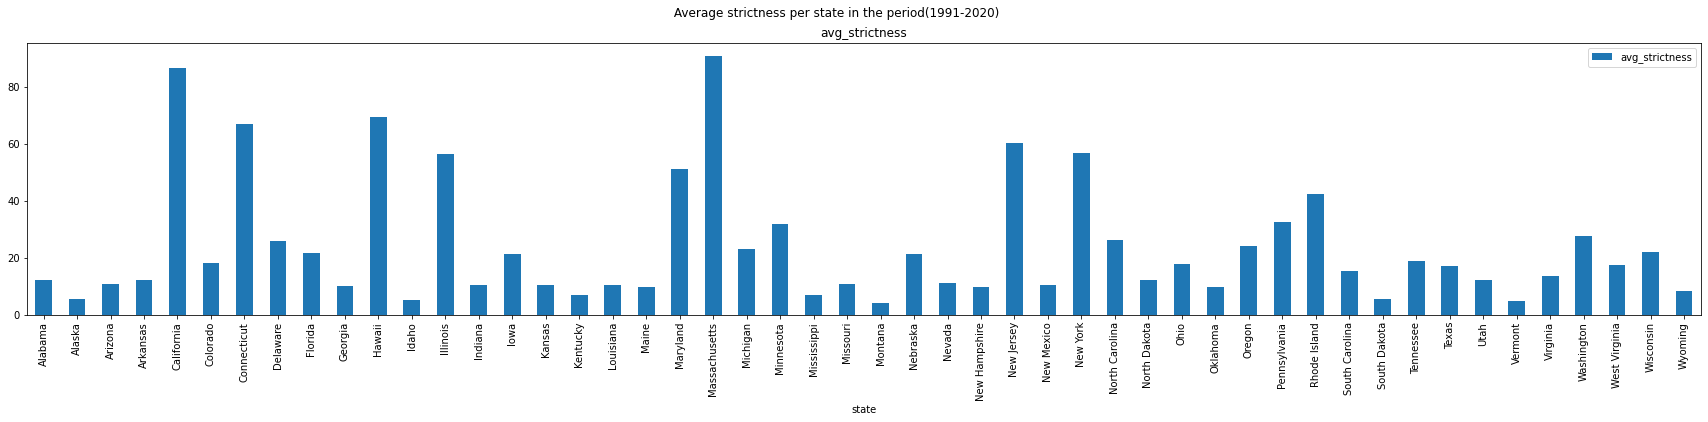

In [66]:
ax = df2[["state","avg_strictness"]].plot(x='state', kind='bar',  rot=90,title=' Average strictness per state in the period(1991-2020) ',subplots=True,layout=(1,1),figsize=(30,5))

In [ ]:
#adding a column called heavily stricted that takes values either 0 or 1 
df2.loc[df2['avg_strictness'] >= df2.avg_strictness.mean(), ['Heavily_stricted']] = '0'
df2.loc[df2['avg_strictness'] <= df2.avg_strictness.mean(), ['Heavily_stricted']] = '1'


In [ ]:
df2 = df2.reset_index()
df2

,state,avg_strictness,Heavily_stricted
0,Alabama,12.166667,1
1,Alaska,5.466667,1
2,Arizona,10.833333,1
3,Arkansas,12.333333,1
4,California,86.633333,0
5,Colorado,18.066667,1
6,Connecticut,67.066667,0
7,Delaware,25.766667,0
8,Florida,21.800000,1
9,Georgia,10.166667,1


In [ ]:
#appending the the violent crimes column to the data set
df2['Total Violent Crimes'] = per_final_df['Total Violent Crimes']
df2

,state,avg_strictness,Heavily_stricted,Total Violent Crimes
0,Alabama,12.166667,1,12120.666667
1,Alaska,5.466667,1,5447.000000
2,Arizona,10.833333,1,5391.722222
3,Arkansas,12.333333,1,42505.521739
4,California,86.633333,0,30789.000000
5,Colorado,18.066667,1,33655.642857
6,Connecticut,67.066667,0,21042.000000
7,Delaware,25.766667,0,20992.380952
8,Florida,21.800000,1,1508.318182
9,Georgia,10.166667,1,421.000000


In [ ]:
#dividing the states according to their categeory (heavily stricted - not heavily stricted)
df2_heavy = df2[df2['Heavily_stricted'] == '1']
df2_not_heavy = df2[df2['Heavily_stricted'] == '0']
df2_heavy


,state,avg_strictness,Heavily_stricted,Total Violent Crimes
0,Alabama,12.166667,1,12120.666667
1,Alaska,5.466667,1,5447.000000
2,Arizona,10.833333,1,5391.722222
3,Arkansas,12.333333,1,42505.521739
5,Colorado,18.066667,1,33655.642857
8,Florida,21.800000,1,1508.318182
9,Georgia,10.166667,1,421.000000
11,Idaho,5.166667,1,9686.250000
13,Indiana,10.433333,1,10885.806452
14,Iowa,21.533333,1,16691.777778


In [ ]:
df2_not_heavy

,state,avg_strictness,Heavily_stricted,Total Violent Crimes
4,California,86.633333,0,30789.000000
6,Connecticut,67.066667,0,21042.000000
7,Delaware,25.766667,0,20992.380952
10,Hawaii,69.500000,0,25137.666667
12,Illinois,56.633333,0,16692.400000
19,Maryland,51.166667,0,3828.157895
20,Massachusetts,90.833333,0,8508.166667
22,Minnesota,31.800000,0,136593.222222
29,New Jersey,60.500000,0,14253.650000
31,New York,56.900000,0,20785.750000


# Hypothesis Testing

**4.1**

**Claim:** U.S. states that implement stricter firearm control laws, have lower violent crime rates on average.

**Note:** I will divide the states into two categories, heavily strict states and less strict states and the threshold that decides will be the mean of the average strictness per state across all years.

**Null hypothesis H0:** there will be no difference in the average crime rate between heavily strict states and the other states.

**The test:** the test used here is the T-test as we are comparing the means of two different groups.

In [ ]:
from scipy.stats import ttest_ind

test_res = ttest_ind(df2_heavy['Total Violent Crimes'],
                     df2_not_heavy['Total Violent Crimes'],
                     alternative = 'less' )
print(f"p-value: {test_res[1]:.03f}")

p-value: 0.544


**Test result:** the p-value = 0.544, which means that the null hypothesis cannot be rejected. Therefore, we can deduce that the american society has a violent behaviour regardless of laws being strict or not.

**4.2**

**Claim**: Black people are assigned a high risk score compared to white people.

**Note:** I will divide the criminals from the dataset "Recidivism data for the state of Georgia [2013-2015]" into two categories; Blacks and Whites.

**Null hypothesis H0:** there will be no difference in the Supervision Risk Score between Black and White people.

**The test:** the test used here is the T-test as we are comparing the means of two different populations.

In [64]:


test_res = ttest_ind(df_black.dropna()['Supervision_Risk_Score_First'], df_white.dropna()['Supervision_Risk_Score_First'],alternative = 'less')
print(f"p-value: {test_res[1]}")

p-value: 0.9999999998138163


**Test result:** the p-value = 0.9999999998138163, which means that the null hypothesis cannot be rejected. Therefore, we cannot say that the blacks are assigned a high risk score compared to the whites.